# Лекция 4

In [1]:
import pandas as pd
import numpy as np
import tqdm
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from math import sqrt

In [8]:
!pip install arch

In [2]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [3]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        
        plt.tight_layout()
    return

In [4]:
from arch import arch_model

In [5]:
series = pd.read_csv('international-airline-passengers.csv')['Count']

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


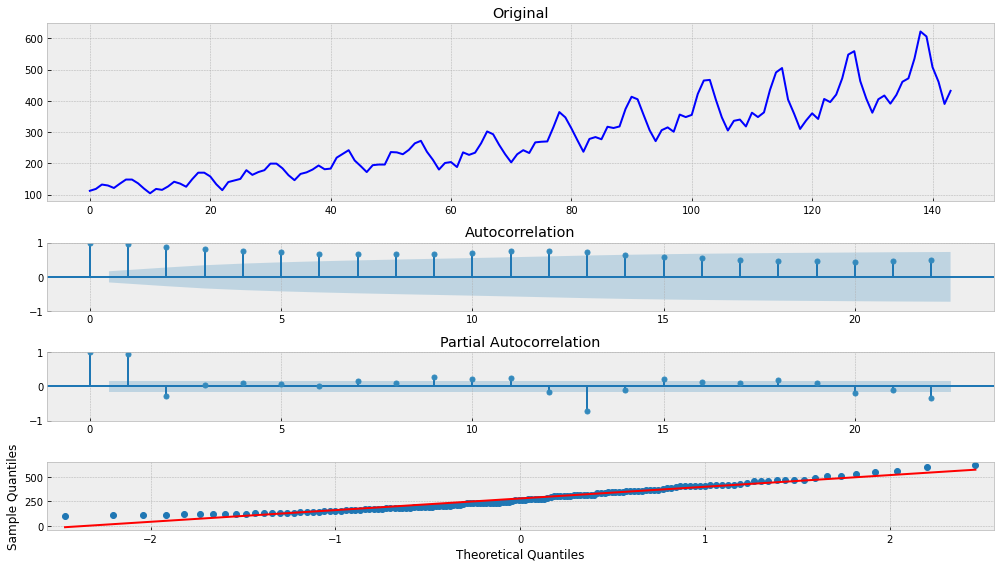

In [6]:
tsplot(series)

In [8]:
series2 = boxcox(series, 0)
series2 = np.diff(series2, 1)
series2 = series2[12:] - series2[:-12]

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


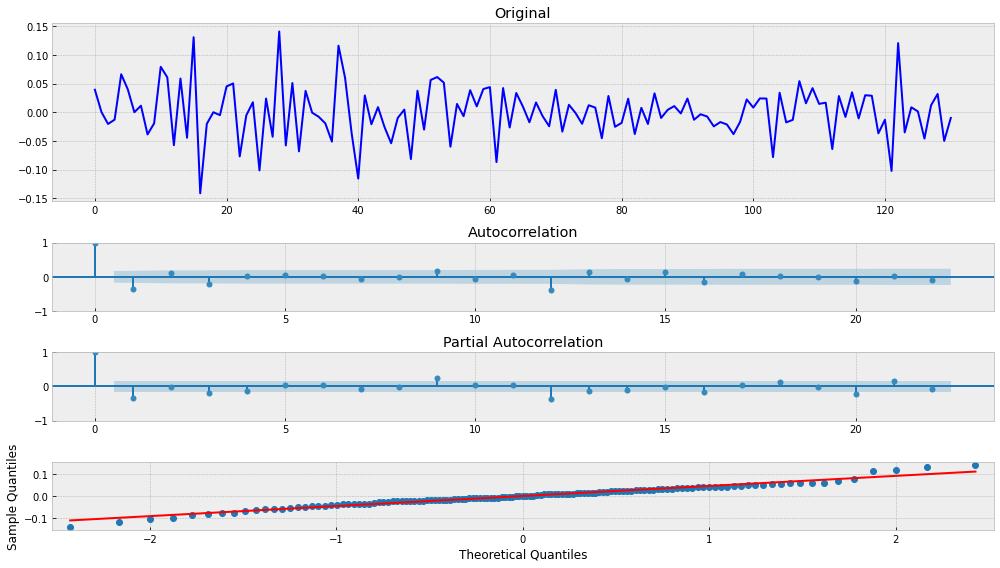

In [9]:
tsplot(series2)

In [10]:
am = arch_model(series2,p = 5, q = 5, o = 5, dist = 't')
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:    107,   Neg. LLF: -210.10284284892745
Iteration:     10,   Func. Count:    207,   Neg. LLF: -229.854088007629
Iteration:     15,   Func. Count:    314,   Neg. LLF: -223.78327783918868
Iteration:     20,   Func. Count:    414,   Neg. LLF: -230.5830800066662
Iteration:     25,   Func. Count:    514,   Neg. LLF: -230.8012818516602
Iteration:     30,   Func. Count:    609,   Neg. LLF: -230.92643767426023
Iteration:     35,   Func. Count:    704,   Neg. LLF: -231.04782406593714
Iteration:     40,   Func. Count:    800,   Neg. LLF: -231.04839662136436
Optimization terminated successfully    (Exit mode 0)
            Current function value: -231.0510259302801
            Iterations: 41
            Function evaluations: 810
            Gradient evaluations: 40
                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                            y   R-squared:                       0.000
Mean Model:                   C

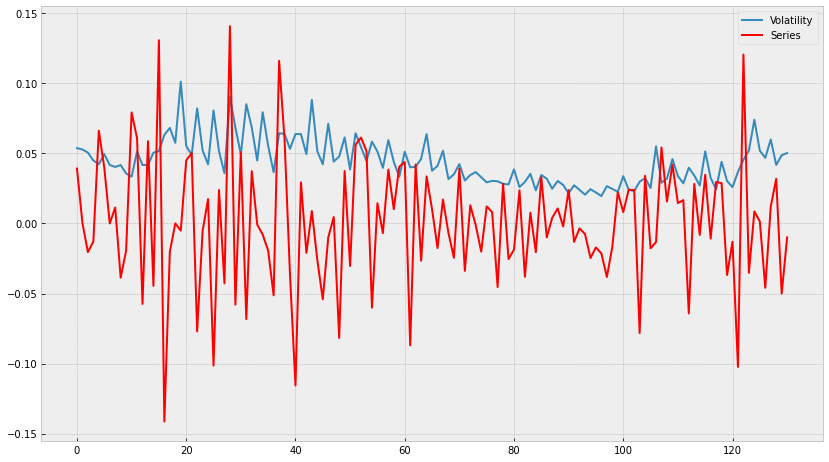

In [12]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(res.conditional_volatility, label='Volatility')
    plt.plot(series2, color='red', label='Series')
    plt.legend()

In [ ]:
# получаем график волатильности(изменчивости показателя)